# Stability Analysis for Pahoehoe to a'a project

### When coupled with utils.py, this notebook graphs the stability results of the Linear Stability Analysis first introduced in Yih 1967 https://doi.org/10.1017/jfm.2017.418. 

#### For verification purposes, copy and paste the following into the notebook cell below:
```
from utils import *
N_POINTS = 2500
params = {"g" : 1, "d1" : 1, "d2" : 2, "d2s" : [1.25, 2.5, 5, 10], "mu1" : 1, "mu2" : .8, "mu2s" : np.linspace(1.001, 100, N_POINTS), "rho1" : 1, "rho2" : 1, "U0" : 1, "dP" : 0, "verbose" : False, "colors_red" : [ "#fdecdd", "#fdbe85", "#fd8d3c", "#d94701"], "colors_blue":  ["#eef0fe", "#bdd7e7", "#6baed6", "#2171b5"],
}
plot_stability_graph(**params)

```
#### The graph generated should match that of Figure 2(b) in https://doi.org/10.1017/jfm.2017.418. 

# Notebook Use: 
#### Full instructions can be found in the readme. The graphing functions ```plot_stability_graph()``` and ```plot_vel_profile()``` rely on the construction of the ```params``` dictionary with specially named variables. The presence of ranged values for mu2, rho2, and dP within ```params``` results in the graphing of the stability over that variable, using the other parameters declared. 

#### ```params``` can validly contain both ```"mu2"``` and ```"mu2s"``` at the same time. When graphing stability over velocity difference, values from  ```"mu2s"``` will be used. However, if stability is graphed over density or pressure differences, the value ```"mu2"``` and ```"mu1"``` will be used to calculate a single ```"m"``` used for all points of the graph. 

## Realistic ranges of parameters

### Density: Top layer 0-10% less dense (likely an overestimate, closer to 3%), informed by Aubele 1988

### Viscosity: Could be up to 5 orders of magnitude difference between upper layer and lower layer

### Height: test very thin bottom, very thin top, equal sizes

### A1: not a good sense of what this could be 

In [1]:
from utils import *
N_POINTS = 5000

params = {
    "g" : 1,
    
    "d1" : 1,
    "d2" : 2,
    "d2s" : [.5, .75, 1, 1.25, 2],
    
    "mu1" : 1,
    "mu2" : .1,
    "mu2s" : np.linspace(0.001, .999, N_POINTS),
    
    "rho1" : 1,
    "rho2" : 1,
    #"rho2s" : np.linspace(1, 100, N_POINTS),
    
    "U0" : 1,
    "dP" : 0, # K value
    "dPs" : np.linspace(0, 1000, N_POINTS),
    "verbose" : False,
    
    #"colors_red" : ["#fdbe85", "#fd8d3c", "#d94701"],
    #"colors_blue":  ["#bdd7e7", "#6baed6", "#2171b5"],
   
    "colors_red" : ["#f4a582", "#ca0020"],
    "colors_blue":  ["#92c5de", "#0571b0"],
    "color_one" : "#dfdfaf",
    
    #ca0020
#f4a582
#f7f7f7
#92c5de
#0571b0
    
    "N_POINTS" : N_POINTS,
    
   # "save" : None,
    
    #"viscosity_lim" : (-.25,.25),
    "density_lim" : (-.25,.25),
    #"pressure_lim" : (-1, 1)
    
    "title_size" : 12,
    "label_size" : 12, 
    
    "cache_J" : {},
    "cache_vecs" : {}
}

def plot_both(params):
    plot_stability_graph(**params)
    plot_vel_profile(**params)
    

updates as of 2:56
updates as of 2:56


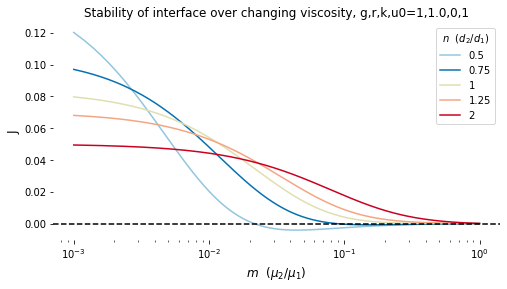

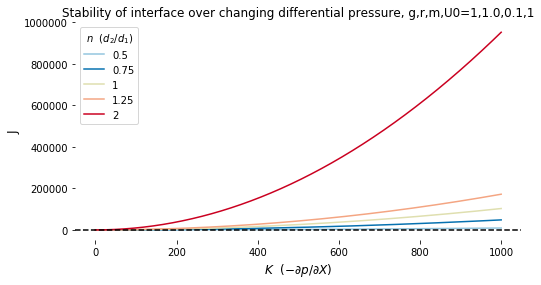

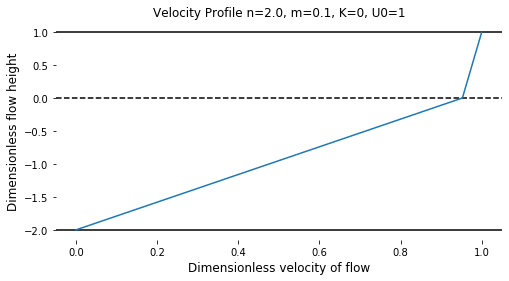

In [2]:
plot_both(params)